<h1 style="text-align: center">Optymalizacja wycinania kafli</h1>
<h2 style="text-align: center">Inteligencja Obliczniowa, projekt 1</h2>
<h3 style="text-align: center">Karol Studniarek</h3>

#### Opis problemu - tło
    Chemia na pierwszy rzut oka kojarzy nam się z łączeniem pierwiastków w substancje, substancje w inne substancje itd. Oczywiście jest to dobre skojarzenie, ponieważ w większości o to chodzi w chemii, jednakże w skojarzeniu pomijamy całą otoczkę produkcji chemicznej. Chemicy do swojej codziennej pracy korzystają z mądrości i techniki z innych dziedzin naukowych, między innymi fizyki czy informatyki. Pewnego dnia podczas rozmowy z kolegą zajmującym się produkcją odczynników do wywoływania filmów powiedział mi on o problemie z którym mierzy się na codzień - wycinanie mniejszych części z większego arkusza. Brzmi to dość enigmatycznie, jednakże konkrety techniczne operacji nie są istotne. Doszliśmy do wniosku, że jest to problem, do którego trzeba podejść inaczej - lepiej, szybciej.


#### Opis problemu - cechy charakterystyczne

Aby wyborazić sobie co potrzebujemy zrobić zapominamy o otoczce chemicznej. Problem sprowadza się do wycinania **kafelków** z **arkusza**.
Warunki zadania:

    1. Arkusz, z którego wycinamy, jest kwadratem o zadanym boku.
    2. Arkusz występuje w trzech wariantach produkcyjnych, 20, 40, 60 cm. (parametr wywołania)
    3. Kafle są prostokątami o wymiarach AxB
    4. Powierzchnia kafla powinna być jak największa.
    5. Bok A kafla jest nie mniejszy niż zadana długość (wartość optymalizowana, ograniczona parametrem)
    6. Bok B kafla jest podany jako stałą
    
    


#### Wymagania

Aby problem uznać za rozwiązany, potrzebujemy w wyniku końcowym dwóch informacji:
- Jakie wymiary mają mieć wycięte kafelki? (algorytm genetyczny)
- W jaki sposób je wyciąć? (ścieżki mrówek)

In [59]:
# Dane wejściowe:
sheetSize = 60
aLimiter = 3
b = 5

##### Funkcja fitness
Jak opisać funkcję fitness? 
- Jeżeli bok A wychodzi poza ograniczenie "zerujemy" wynik
- Karzemy za stratę materiału odejmując jej powierzchnie * waga (waga=1.2 )
- Dodajemy punkty jako powierzchnia kafelka * waga (waga=1.3 )
- Dodajemy punkty do wyniku za ilość kafelków (waga=1.1 )


In [3]:
import pygad
import numpy as np

 : [12.]
Powierzchnia 


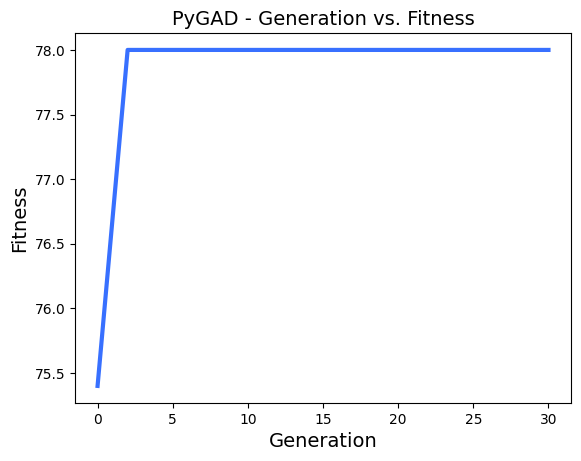

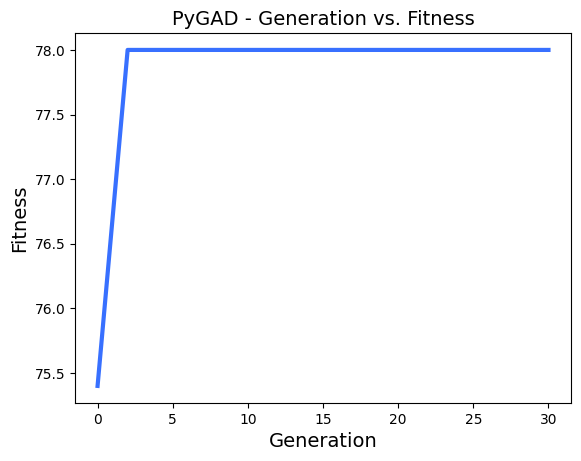

In [65]:
gene_space = np.arange(0,sheetSize,1.e-1)

def helper(a):
    result = 0
    if a < aLimiter:
        return 0
    # określanie ilości 
    for i in range(int(sheetSize/b)):
        if a*b > sheetSize:
            # ilość 
            result+=(i-1)*1.1
            # strata
            result-=(sheetSize*sheetSize)-((a*b)*(i-1))*1.2  
    # powierzchnia
    result+=a*b*1.3
    return float(result)

def fitness_func(solution, solution_idx):
    return helper(solution)
    
fitness_function = fitness_func

# ile chromsomów w populacji
# ile genow ma chromosom
sol_per_pop = 200
num_genes = 1

# ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
# ile pokolen
# ilu rodzicow zachowac (kilka procent)
num_parents_mating = 100
num_generations = 30
keep_parents = 2

# jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

# w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

# mutacja ma dzialac na ilu procent genow?
# trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 1

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

# uruchomienie algorytmu
ga_instance.run()

# podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(" : {solution}".format(solution=solution))
# print("Fitness value of the best solution = {solution_fitness}".format(
#     solution_fitness=solution_fitness))
print("Powierzchnia ")


# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()
